<a href="https://colab.research.google.com/github/LipeSilva83/Alura_Store_BR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [11]:
faturamentos = {
    'loja1': float(sum(loja1['Preço'])),
    'loja2': float(sum(loja2['Preço'])),
    'loja3': float(sum(loja3['Preço'])),
    'loja4': float(sum(loja4['Preço'])),
}

for loja, faturamento in faturamentos.items():
    print(f'{loja}: {faturamento:.2f}')



loja1: 1534509.12
loja2: 1488459.06
loja3: 1464025.03
loja4: 1384497.58


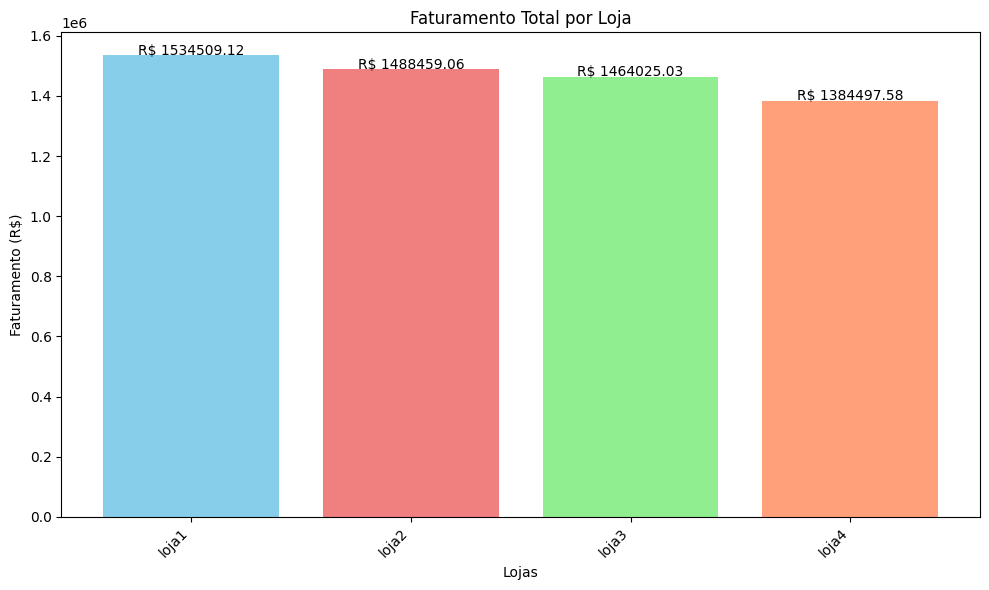

In [12]:
import matplotlib.pyplot as plt

faturamentos = {
    'loja1': 1534509.12,
    'loja2': 1488459.06,
    'loja3': 1464025.03,
    'loja4': 1384497.58,
      }


nomes_lojas = list(faturamentos.keys())
valores_faturamento = list(faturamentos.values())
cores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']


plt.figure(figsize=(10, 6))
plt.bar(nomes_lojas, valores_faturamento, color=cores)

plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento Total por Loja')
plt.xticks(rotation=45, ha='right')


for i, v in enumerate(valores_faturamento):
    plt.text(i, v + 500, f'R$ {v:.2f}', ha='center')


plt.tight_layout()


plt.show()

In [13]:
maior_faturamento_loja = max(faturamentos.items(), key=lambda x: x[1])
maior_faturamento = maior_faturamento_loja[1]
nome_da_loja = maior_faturamento_loja[0]
print(f'Maior faturamento foi de: {maior_faturamento:.2f} da {nome_da_loja}')

Maior faturamento foi de: 1534509.12 da loja1


In [14]:
menor_faturamento_loja = min(faturamentos.items(), key=lambda x: x[1])
menor_faturamento = menor_faturamento_loja[1]
nome_da_loja = menor_faturamento_loja[0]
print(f'Menor faturamento foi de: {menor_faturamento:.2f} da {nome_da_loja}')

Menor faturamento foi de: 1384497.58 da loja4


# 2. Vendas por Categoria


In [17]:
vendas_por_categoria1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria1)

Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64


In [20]:
vendas_por_categoria2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria2)

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


In [21]:
vendas_por_categoria3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria2)

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


In [22]:
vendas_por_categoria4 = loja4.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria2)

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
